In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
#Shifting all data from xls format into cleaned up df
lebron_reg_datalist = pd.read_html("data_files/Lebron_Regular_Season.xls")
lebron_reg_data = ""
for i in lebron_reg_datalist:
    lebron_reg_data = i
lebron_reg_data = lebron_reg_data[:22]


jordan_reg_datalist = pd.read_html("data_files/Jordan_Regular_Season.xls")
jordan_reg_data = ""
for i in jordan_reg_datalist:
    jordan_reg_data = i
jordan_reg_data = jordan_reg_data[:19]

lebron_reg_data.columns


Index(['Season', 'Age', 'Team', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')

In [114]:
# Find out mvp award placing of both players for each season

lebron_reg_data = lebron_reg_data[['Season','Awards']]
lebron_reg_awards=lebron_reg_data['Awards'].str.split(',').apply(pd.Series)
lebron_reg_awards['Season'] = lebron_reg_data['Season'] 
lebron_reg_awards = lebron_reg_awards.drop([lebron_reg_awards.columns[1],lebron_reg_awards.columns[2],lebron_reg_awards.columns[3]],axis=1)
lebron_reg_awards.iloc[:, 0] = lebron_reg_awards.iloc[:, 0].apply(lambda x: x if str(x).startswith('MVP-') else np.nan)
lebron_reg_awards.columns = ["Lebron Standings","Lebron Season"]


jordan_reg_data = jordan_reg_data[['Season','Awards']]
jordan_reg_awards=jordan_reg_data['Awards'].str.split(',').apply(pd.Series)
jordan_reg_awards['Season'] = jordan_reg_data['Season'] 
jordan_reg_awards = jordan_reg_awards.drop([jordan_reg_awards.columns[1],jordan_reg_awards.columns[2],jordan_reg_awards.columns[3]],axis=1)
jordan_reg_awards.iloc[:, 0] = jordan_reg_awards.iloc[:, 0].apply(lambda x: x if str(x).startswith('MVP-') else np.nan)
jordan_reg_awards.columns = ["Jordan Standings","Jordan Season"]

mvp_awards =  pd.concat([lebron_reg_awards, jordan_reg_awards], axis=1)
mvp_awards


,Lebron Standings,Lebron Season,Jordan Standings,Jordan Season
0,MVP-9,2003-04,MVP-6,1984-85
1,MVP-6,2004-05,NaN,1985-86
2,MVP-2,2005-06,MVP-2,1986-87
3,MVP-5,2006-07,MVP-1,1987-88
4,MVP-4,2007-08,MVP-2,1988-89
5,MVP-1,2008-09,MVP-3,1989-90
6,MVP-1,2009-10,MVP-1,1990-91
7,MVP-3,2010-11,MVP-1,1991-92
8,MVP-1,2011-12,MVP-3,1992-93
9,MVP-1,2012-13,NaN,1993-94


In [115]:
mvp_awards['Lebron MVP Placing'] = pd.to_numeric(mvp_awards['Lebron Standings'].str.split('-').str[-1], errors='coerce')
mvp_awards['Jordan MVP Placing'] = pd.to_numeric(mvp_awards['Jordan Standings'].str.split('-').str[-1], errors='coerce')
mvp_awards = mvp_awards[['Lebron Season', 'Lebron Standings', 'Lebron MVP Placing', 'Jordan Season', 'Jordan Standings', 'Jordan MVP Placing']]
mvp_awards.head()

,Lebron Season,Lebron Standings,Lebron MVP Placing,Jordan Season,Jordan Standings,Jordan MVP Placing
0,2003-04,MVP-9,9.0,1984-85,MVP-6,6.0
1,2004-05,MVP-6,6.0,1985-86,NaN,NaN
2,2005-06,MVP-2,2.0,1986-87,MVP-2,2.0
3,2006-07,MVP-5,5.0,1987-88,MVP-1,1.0
4,2007-08,MVP-4,4.0,1988-89,MVP-2,2.0


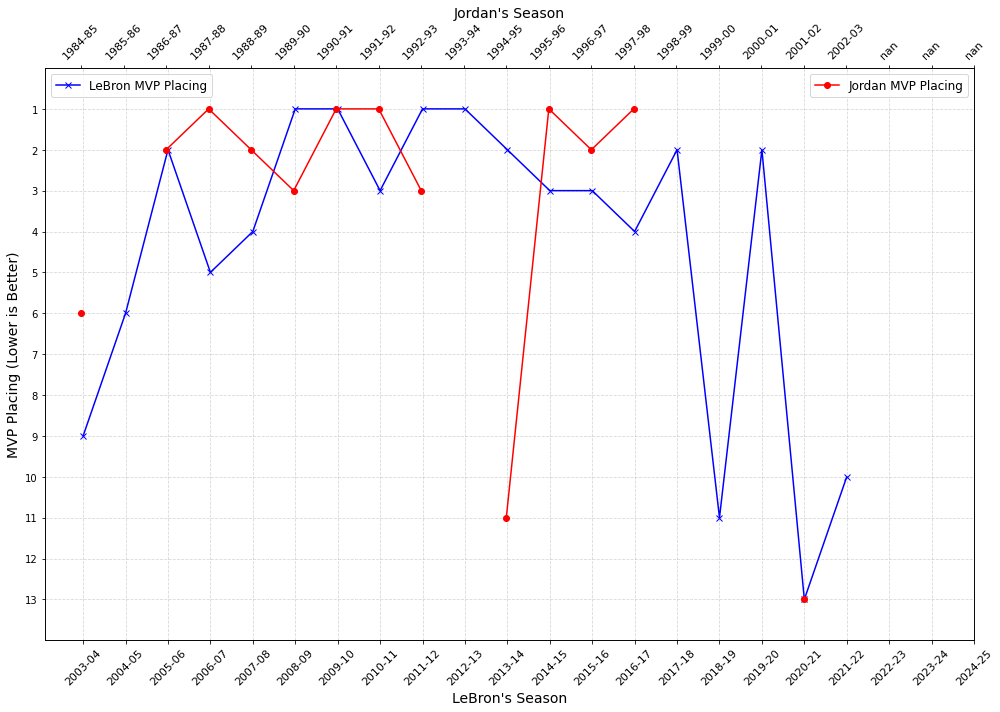

In [116]:
plt.figure(figsize=(14, 10))

# Create the first axis (bottom)
ax1 = plt.gca()

# Plot LeBron MVP Placing over Time (x-axis will be the row number)
ax1.plot(mvp_awards.index + 1, mvp_awards['Lebron MVP Placing'], marker='x', color='blue', label="LeBron MVP Placing")

# Set the x-axis for LeBron at the bottom
ax1.set_xlabel("LeBron's Season", fontsize=14)
ax1.set_ylabel("MVP Placing (Lower is Better)", fontsize=14)

# Set x-ticks to be the row number, starting from 1
ax1.set_xticks(mvp_awards.index + 1)
ax1.set_xticklabels(mvp_awards['Lebron Season'], fontsize=11, rotation=45)

# Invert the y-axis so that 1st place is at the top (lower number is better)
ax1.invert_yaxis()

# Set y-axis limits (ensuring it spans from 1 to 12, allowing some space above 10)
ax1.set_ylim(0, 14)

# Adjust y-ticks to be incremented by 1
ax1.set_yticks(np.arange(1, 14, 1))  # Start from 1, go up to 13, increment by 1

# Add grid and legend for LeBron
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper left", fontsize=12)

# Create a second axis (top)
ax2 = ax1.twiny()  # Creates a second x-axis that shares the same y-axis

# Plot Jordan MVP Placing over Time (x-axis will be the row number)
ax2.plot(mvp_awards.index + 1, mvp_awards['Jordan MVP Placing'], marker='o', color='red', label="Jordan MVP Placing")

# Set the x-axis for Jordan at the top
ax2.set_xlabel("Jordan's Season", fontsize=14)
ax2.set_xticks(mvp_awards.index + 1)
ax2.set_xticklabels(mvp_awards['Jordan Season'], fontsize=11, rotation=45)

# Add grid and legend for Jordan
ax2.legend(loc="upper right", fontsize=12)

# Invert the y-axis to ensure 1st place is at the top
ax2.invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


In [117]:
# Find out stats of top 3 mvp candidates in all season
mvp_contenders = pd.read_excel("data_files/MVP title race.xlsx")
mvp_contenders = mvp_contenders[["Season","Player", "Age","PTS","AST","TRB","STL","BLK"]]
mvp_contenders['Season'] = mvp_contenders['Season'].str.replace(' ', '', regex=False)
mvp_contenders.head()

,Season,Player,Age,PTS,AST,TRB,STL,BLK
0,2020-21,Nikola Jokic,25.0,26.4,8.3,10.8,1.3,0.7
1,2020-21,Joel Embiid,26.0,28.5,2.8,10.6,1.0,1.4
2,2020-21,Stephen Curry,32.0,32.0,5.8,5.5,1.2,0.1
3,2019-20,Giannis Antetokounmpo,25.0,29.5,5.6,13.6,1.0,1.0
4,2019-20,LeBron James,35.0,25.3,10.2,7.8,1.2,0.5


In [118]:
# Find league average stats for coefficient later
league_avg_datalist = pd.read_excel("data_files/league_average.xlsx")
league_avg_datalist = league_avg_datalist.iloc[::-1]
league_avg_datalist = league_avg_datalist.tail(41)
league_avg_datalist = league_avg_datalist[["Season","PTS","AST","TRB","STL","BLK"]]
league_avg_datalist = league_avg_datalist.reset_index(drop=True)

In [119]:
league_avg_datalist.head()


,Season,PTS,AST,TRB,STL,BLK
0,1984-85,110.8,26.3,43.5,8.5,5.3
1,1985-86,110.2,26.0,43.6,8.8,5.3
2,1986-87,109.9,26.0,44.0,8.6,5.5
3,1987-88,108.2,25.8,43.4,8.5,5.4
4,1988-89,109.2,25.6,43.9,9.1,5.3


In [120]:
# Join mvp_contenders and league_avg
mvp_contenders_avg = pd.merge(mvp_contenders, league_avg_datalist, on='Season', how='inner')
mvp_contenders_avg.columns = ['Season', "Player","Age", "Player PTS", "Player AST", "Player TRB", "Player STL", "Player BLK", "League PTS", "League AST", "League TRB", "League STL", "League BLK"]
mvp_contenders_avg.head()

,Season,Player,Age,Player PTS,Player AST,Player TRB,Player STL,Player BLK,League PTS,League AST,League TRB,League STL,League BLK
0,2020-21,Nikola Jokic,25.0,26.4,8.3,10.8,1.3,0.7,112.1,24.8,44.3,7.6,4.9
1,2020-21,Joel Embiid,26.0,28.5,2.8,10.6,1.0,1.4,112.1,24.8,44.3,7.6,4.9
2,2020-21,Stephen Curry,32.0,32.0,5.8,5.5,1.2,0.1,112.1,24.8,44.3,7.6,4.9
3,2019-20,Giannis Antetokounmpo,25.0,29.5,5.6,13.6,1.0,1.0,111.8,24.4,44.8,7.6,4.9
4,2019-20,LeBron James,35.0,25.3,10.2,7.8,1.2,0.5,111.8,24.4,44.8,7.6,4.9


In [121]:
# Find coefficient by dividing player stats to league stats
mvp_contenders_avg['PTS_coeff'] = (mvp_contenders_avg['Player PTS'] / mvp_contenders_avg['League PTS']).round(2)
mvp_contenders_avg['AST_coeff'] = (mvp_contenders_avg['Player AST'] / mvp_contenders_avg['League AST']).round(2)
mvp_contenders_avg['TRB_coeff'] = (mvp_contenders_avg['Player TRB'] / mvp_contenders_avg['League TRB']).round(2)
mvp_contenders_avg['STL_coeff'] = (mvp_contenders_avg['Player STL'] / mvp_contenders_avg['League STL']).round(2)
mvp_contenders_avg['BLK_coeff'] = (mvp_contenders_avg['Player BLK'] / mvp_contenders_avg['League BLK']).round(2)
mvp_contenders_avg[mvp_contenders_avg['Season'] == '2001-02']


,Season,Player,Age,Player PTS,Player AST,Player TRB,Player STL,Player BLK,League PTS,League AST,League TRB,League STL,League BLK,PTS_coeff,AST_coeff,TRB_coeff,STL_coeff,BLK_coeff
54,2001-02,Tim Duncan,25.0,25.5,3.7,12.7,0.7,2.5,95.5,21.9,42.4,7.8,5.2,0.27,0.17,0.30,0.09,0.48
55,2001-02,Jason Kidd,28.0,14.7,9.9,7.3,2.1,0.2,95.5,21.9,42.4,7.8,5.2,0.15,0.45,0.17,0.27,0.04
56,2001-02,Shaquille O'Neal,29.0,27.2,3.0,10.7,0.6,2.0,95.5,21.9,42.4,7.8,5.2,0.28,0.14,0.25,0.08,0.38


In [122]:
mvp_team_records = pd.read_excel("data_files/MVP title race and team record.xlsx")
mvp_team_records.head()

,Season,Player,Age,Tm,Record,Standings
0,2020 - 21,Nikola Jokic,25.0,DEN,47-25,5.0
1,2020 - 21,Joel Embiid,26.0,PHI,49-23,3.0
2,2020 - 21,Stephen Curry,32.0,GSW,39-33,14.0
3,2019 - 20,Giannis Antetokounmpo,25.0,MIL,56-17,1.0
4,2019 - 20,LeBron James,35.0,LAL,52-19,3.0


In [123]:
mvp_team_records['Season'] = mvp_team_records['Season'].str.replace(" ", "", regex=False)


In [124]:
# Merged team and player record
merged_mvp_df = pd.merge(mvp_contenders_avg, mvp_team_records, on=['Player', 'Season'],how='left')
merged_mvp_df.head()


,Season,Player,Age_x,Player PTS,Player AST,Player TRB,Player STL,Player BLK,League PTS,League AST,League TRB,League STL,League BLK,PTS_coeff,AST_coeff,TRB_coeff,STL_coeff,BLK_coeff,Age_y,Tm,Record,Standings
0,2020-21,Nikola Jokic,25.0,26.4,8.3,10.8,1.3,0.7,112.1,24.8,44.3,7.6,4.9,0.24,0.33,0.24,0.17,0.14,25.0,DEN,47-25,5.0
1,2020-21,Joel Embiid,26.0,28.5,2.8,10.6,1.0,1.4,112.1,24.8,44.3,7.6,4.9,0.25,0.11,0.24,0.13,0.29,26.0,PHI,49-23,3.0
2,2020-21,Stephen Curry,32.0,32.0,5.8,5.5,1.2,0.1,112.1,24.8,44.3,7.6,4.9,0.29,0.23,0.12,0.16,0.02,32.0,GSW,39-33,14.0
3,2019-20,Giannis Antetokounmpo,25.0,29.5,5.6,13.6,1.0,1.0,111.8,24.4,44.8,7.6,4.9,0.26,0.23,0.30,0.13,0.20,25.0,MIL,56-17,1.0
4,2019-20,LeBron James,35.0,25.3,10.2,7.8,1.2,0.5,111.8,24.4,44.8,7.6,4.9,0.23,0.42,0.17,0.16,0.10,35.0,LAL,52-19,3.0


In [125]:
# Create new column W/L% from Record
wins_losses = merged_mvp_df['Record'].str.split('-', expand=True).astype(float)
merged_mvp_df['W/L%'] = wins_losses[0] / (wins_losses[0] + wins_losses[1])

In [126]:
merged_mvp_df.head()

,Season,Player,Age_x,Player PTS,Player AST,Player TRB,Player STL,Player BLK,League PTS,League AST,League TRB,League STL,League BLK,PTS_coeff,AST_coeff,TRB_coeff,STL_coeff,BLK_coeff,Age_y,Tm,Record,Standings,W/L%
0,2020-21,Nikola Jokic,25.0,26.4,8.3,10.8,1.3,0.7,112.1,24.8,44.3,7.6,4.9,0.24,0.33,0.24,0.17,0.14,25.0,DEN,47-25,5.0,0.652778
1,2020-21,Joel Embiid,26.0,28.5,2.8,10.6,1.0,1.4,112.1,24.8,44.3,7.6,4.9,0.25,0.11,0.24,0.13,0.29,26.0,PHI,49-23,3.0,0.680556
2,2020-21,Stephen Curry,32.0,32.0,5.8,5.5,1.2,0.1,112.1,24.8,44.3,7.6,4.9,0.29,0.23,0.12,0.16,0.02,32.0,GSW,39-33,14.0,0.541667
3,2019-20,Giannis Antetokounmpo,25.0,29.5,5.6,13.6,1.0,1.0,111.8,24.4,44.8,7.6,4.9,0.26,0.23,0.30,0.13,0.20,25.0,MIL,56-17,1.0,0.767123
4,2019-20,LeBron James,35.0,25.3,10.2,7.8,1.2,0.5,111.8,24.4,44.8,7.6,4.9,0.23,0.42,0.17,0.16,0.10,35.0,LAL,52-19,3.0,0.732394


In [127]:
# Import feature importance from my mvp data science proj to compare level of competition
feature_impt = pd.read_excel("data_files/mvp_feature_importance.xlsx")
feature_impt

,Feature,XGB Gain,GB Importance,Combined
0,PTS,0.184312,0.292969,0.238640
1,L,0.166815,0.076434,0.121625
2,W/L%,0.111481,0.075923,0.093702
3,AST,0.067032,0.089917,0.078475
4,TRB,0.064882,0.084309,0.074595
5,W,0.062243,0.054304,0.058273
6,G,0.056000,0.034303,0.045151
7,FG%,0.043245,0.046961,0.045103
8,PA/G,0.055637,0.031424,0.043530
9,BLK,0.036193,0.043747,0.039970


In [128]:
# Some of these feature is no in my current project, so I dropped these columns
features_to_drop = ['W','L','G','FG%','PA/G','PS/G','FT%','3P%','MP']
feature_impt_rel = feature_impt[~feature_impt['Feature'].isin(features_to_drop)].copy()
feature_impt_rel['Normalized'] = feature_impt_rel['Combined'] / feature_impt_rel['Combined'].sum()
feature_importance_dict = dict(zip(feature_impt_rel['Feature'], feature_impt_rel['Normalized']))
feature_importance_dict

{'PTS': 0.41367815919140993,
 'W/L%': 0.16243039457478362,
 'AST': 0.13603457190955284,
 'TRB': 0.12930981692698454,
 'BLK': 0.06928750986318988,
 'STL': 0.05969343852176176,
 'Age': 0.029566109012317335}

In [129]:
merged_mvp_rel_df = merged_mvp_df[['Season', 'Player','Age_x','Tm','W/L%','PTS_coeff','AST_coeff','TRB_coeff','STL_coeff','BLK_coeff']]
merged_mvp_rel_df.rename(columns={
    'PTS_coeff': 'PTS',
    'AST_coeff': 'AST',
    'TRB_coeff': 'TRB',
    'STL_coeff': 'STL',
    'BLK_coeff': 'BLK',
    'Age_x': 'Age'
}, inplace=True)


merged_mvp_rel_df['competition_score'] = merged_mvp_rel_df[list(feature_importance_dict.keys())].dot(
    list(feature_importance_dict.values())
)


C:\Users\User\AppData\Local\Temp\ipykernel_11052\3115816458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_mvp_rel_df.rename(columns={
C:\Users\User\AppData\Local\Temp\ipykernel_11052\3115816458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_mvp_rel_df['competition_score'] = merged_mvp_rel_df[list(feature_importance_dict.keys())].dot(


In [131]:
merged_mvp_rel_df.head()

,Season,Player,Age,Tm,W/L%,PTS,AST,TRB,STL,BLK,competition_score
0,2020-21,Nikola Jokic,25.0,DEN,0.652778,0.24,0.33,0.24,0.17,0.14,1.040240
1,2020-21,Joel Embiid,26.0,PHI,0.680556,0.25,0.11,0.24,0.13,0.29,1.056533
2,2020-21,Stephen Curry,32.0,GSW,0.541667,0.29,0.23,0.12,0.16,0.02,1.211807
3,2019-20,Giannis Antetokounmpo,25.0,MIL,0.767123,0.26,0.23,0.30,0.13,0.20,1.063012
4,2019-20,LeBron James,35.0,LAL,0.732394,0.23,0.42,0.17,0.16,0.10,1.344520


In [107]:
# Find the index of the row where the season is '2002-03'
split_index = mvp_contenders_avg[mvp_contenders_avg['Season'] == '2001-02'].index[0]
split_index 

below_or_equal_to_2002 = mvp_contenders_avg.iloc[:split_index + 1]
above_2002 = mvp_contenders_avg.iloc[split_index + 1:]